Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [1]:
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd


In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [2]:
# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
#es = EarlyStopping(monitor='val_loss', mode='min')

autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))
                #callbacks=[es])
                #[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 21s 347us/sample - loss: 0.6931 - val_loss: 0.6931
Epoch 2/100
60000/60000 [==============================] - 18s 302us/sample - loss: 0.6931 - val_loss: 0.6931
Epoch 3/100
60000/60000 [==============================] - 19s 315us/sample - loss: 0.6930 - val_loss: 0.6930
Epoch 4/100
60000/60000 [==============================] - 18s 302us/sample - loss: 0.6930 - val_loss: 0.6929
Epoch 5/100
60000/60000 [==============================] - 19s 313us/sample - loss: 0.6929 - val_loss: 0.6929
Epoch 6/100
60000/60000 [==============================] - 18s 302us/sample - loss: 0.6928 - val_loss: 0.6928
Epoch 7/100
60000/60000 [==============================] - 18s 302us/sample - loss: 0.6928 - val_loss: 0.6928
Epoch 8/100
60000/60000 [==============================] - 18s 301us/sample - loss: 0.6927 - val_loss: 0.6927
Epoch 9/100
60000/60000 [==============================] - 18s 302us/s

60000/60000 [==============================] - 17s 275us/sample - loss: 0.6887 - val_loss: 0.6886
Epoch 75/100
60000/60000 [==============================] - 16s 270us/sample - loss: 0.6886 - val_loss: 0.6886
Epoch 76/100
60000/60000 [==============================] - 17s 277us/sample - loss: 0.6885 - val_loss: 0.6885
Epoch 77/100
60000/60000 [==============================] - 16s 272us/sample - loss: 0.6885 - val_loss: 0.6885
Epoch 78/100
60000/60000 [==============================] - 17s 279us/sample - loss: 0.6884 - val_loss: 0.6884
Epoch 79/100
60000/60000 [==============================] - 17s 278us/sample - loss: 0.6884 - val_loss: 0.6883
Epoch 80/100
60000/60000 [==============================] - 17s 283us/sample - loss: 0.6883 - val_loss: 0.6883
Epoch 81/100
60000/60000 [==============================] - 16s 273us/sample - loss: 0.6882 - val_loss: 0.6882
Epoch 82/100
60000/60000 [==============================] - 17s 279us/sample - loss: 0.6882 - val_loss: 0.6881
Epoch 83/100
6

In [8]:
encoded_imgs

array([[-0.        ,  0.01236617, -0.        , -0.        ],
       [-0.        ,  0.19902335, -0.        , -0.        ],
       [ 0.18976496,  0.0921599 , -0.        , -0.        ],
       ...,
       [-0.        , -0.        , -0.        , -0.        ],
       [ 0.08362268, -0.        , -0.        , -0.        ],
       [ 0.2391984 , -0.        , -0.        , -0.        ]],
      dtype=float32)

In [ ]:
noise = np.random.normal(20,4, (4,4))
noise_preds = decoder.predict(noise)

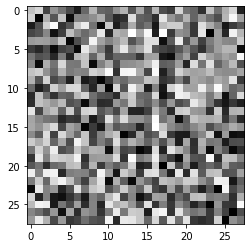

In [10]:
plt.imshow(noise_preds[1].reshape(28,28))

In [11]:
np.max(encoded_imgs)

0.62029934

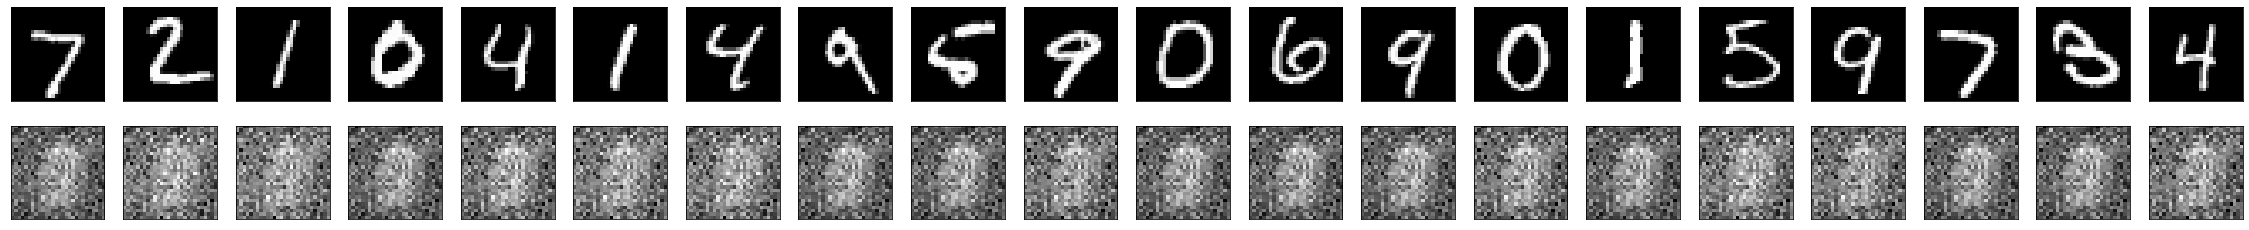

In [6]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
encoded_imgs

array([[-0.        ,  0.01236617, -0.        , -0.        ],
       [-0.        ,  0.19902335, -0.        , -0.        ],
       [ 0.18976496,  0.0921599 , -0.        , -0.        ],
       ...,
       [-0.        , -0.        , -0.        , -0.        ],
       [ 0.08362268, -0.        , -0.        , -0.        ],
       [ 0.2391984 , -0.        , -0.        , -0.        ]],
      dtype=float32)

In [12]:
%matplotlib inline

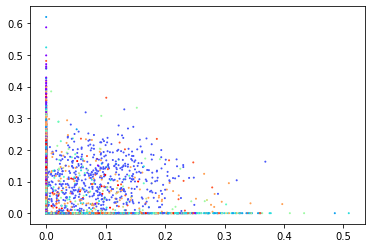

In [13]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

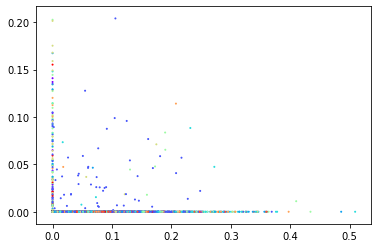

In [14]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

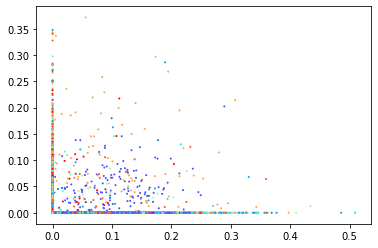

In [15]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

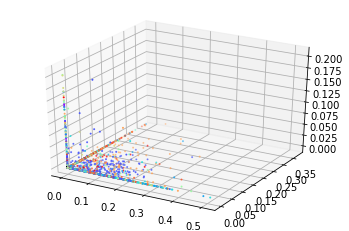

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment
1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [17]:
loss = []

for i in (range(2, 18, 2)): 
    encoding_dim = i
    x = input_img = Input(shape=(784,))
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)
    
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    autoencoder = Model(input_img, decoded)

    encoder = Model(input_img, encoded)

    encoded_input = Input(shape=(encoding_dim,))

    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]

    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

    #es = EarlyStopping(monitor='val_loss', mode='min')

    autoencoder.fit(xtrain, xtrain,
                    epochs=100,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(xtest, xtest))
                    #callbacks=[es])
    
    loss = np.append(loss, np.array(autoencoder.evaluate(xtrain, xtrain)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 22s 363us/sample - loss: 0.6932 - val_loss: 0.6931
Epoch 2/100
60000/60000 [==============================] - 19s 322us/sample - loss: 0.6931 - val_loss: 0.6931
Epoch 3/100
60000/60000 [==============================] - 24s 392us/sample - loss: 0.6930 - val_loss: 0.6930
Epoch 4/100
60000/60000 [==============================] - 19s 312us/sample - loss: 0.6930 - val_loss: 0.6930
Epoch 5/100
60000/60000 [==============================] - 19s 311us/sample - loss: 0.6929 - val_loss: 0.6929
Epoch 6/100
60000/60000 [==============================] - 19s 314us/sample - loss: 0.6929 - val_loss: 0.6928
Epoch 7/100
60000/60000 [==============================] - 18s 303us/sample - loss: 0.6928 - val_loss: 0.6928
Epoch 8/100
60000/60000 [==============================] - 21s 351us/sample - loss: 0.6927 - val_loss: 0.6927
Epoch 9/100
60000/60000 [==============================] - 18s 305us/s

60000/60000 [==============================] - 19s 322us/sample - loss: 0.6889 - val_loss: 0.6888
Epoch 75/100
60000/60000 [==============================] - 20s 340us/sample - loss: 0.6888 - val_loss: 0.6888
Epoch 76/100
60000/60000 [==============================] - 20s 335us/sample - loss: 0.6888 - val_loss: 0.6887
Epoch 77/100
60000/60000 [==============================] - 19s 316us/sample - loss: 0.6887 - val_loss: 0.6887
Epoch 78/100
60000/60000 [==============================] - 20s 336us/sample - loss: 0.6886 - val_loss: 0.6886
Epoch 79/100
60000/60000 [==============================] - 18s 303us/sample - loss: 0.6886 - val_loss: 0.6885
Epoch 80/100
60000/60000 [==============================] - 19s 315us/sample - loss: 0.6885 - val_loss: 0.6885
Epoch 81/100
60000/60000 [==============================] - 21s 343us/sample - loss: 0.6884 - val_loss: 0.6884
Epoch 82/100
60000/60000 [==============================] - 20s 326us/sample - loss: 0.6884 - val_loss: 0.6884
Epoch 83/100
6

60000/60000 [==============================] - 22s 365us/sample - loss: 0.6896 - val_loss: 0.6895
Epoch 47/100
60000/60000 [==============================] - 22s 371us/sample - loss: 0.6895 - val_loss: 0.6894
Epoch 48/100
60000/60000 [==============================] - 20s 335us/sample - loss: 0.6894 - val_loss: 0.6893
Epoch 49/100
60000/60000 [==============================] - 20s 332us/sample - loss: 0.6893 - val_loss: 0.6892
Epoch 50/100
60000/60000 [==============================] - 20s 326us/sample - loss: 0.6892 - val_loss: 0.6891
Epoch 51/100
60000/60000 [==============================] - 18s 306us/sample - loss: 0.6891 - val_loss: 0.6890
Epoch 52/100
60000/60000 [==============================] - 20s 334us/sample - loss: 0.6890 - val_loss: 0.6889
Epoch 53/100
60000/60000 [==============================] - 22s 366us/sample - loss: 0.6889 - val_loss: 0.6888
Epoch 54/100
60000/60000 [==============================] - 24s 401us/sample - loss: 0.6888 - val_loss: 0.6887
Epoch 55/100
6

60000/60000 [==============================] - 22s 366us/sample - loss: 0.6916 - val_loss: 0.6915
Epoch 19/100
60000/60000 [==============================] - 20s 339us/sample - loss: 0.6915 - val_loss: 0.6914
Epoch 20/100
60000/60000 [==============================] - 20s 327us/sample - loss: 0.6914 - val_loss: 0.6914
Epoch 21/100
60000/60000 [==============================] - 19s 320us/sample - loss: 0.6913 - val_loss: 0.6913
Epoch 22/100
60000/60000 [==============================] - 20s 325us/sample - loss: 0.6912 - val_loss: 0.6912
Epoch 23/100
60000/60000 [==============================] - 20s 327us/sample - loss: 0.6911 - val_loss: 0.6911
Epoch 24/100
60000/60000 [==============================] - 20s 332us/sample - loss: 0.6911 - val_loss: 0.6910
Epoch 25/100
60000/60000 [==============================] - 19s 323us/sample - loss: 0.6910 - val_loss: 0.6909
Epoch 26/100
60000/60000 [==============================] - 20s 329us/sample - loss: 0.6909 - val_loss: 0.6908
Epoch 27/100
6

Epoch 92/100
60000/60000 [==============================] - 17s 290us/sample - loss: 0.6763 - val_loss: 0.6759
Epoch 93/100
60000/60000 [==============================] - 17s 290us/sample - loss: 0.6757 - val_loss: 0.6752
Epoch 94/100
60000/60000 [==============================] - 18s 292us/sample - loss: 0.6750 - val_loss: 0.6745
Epoch 95/100
60000/60000 [==============================] - 18s 294us/sample - loss: 0.6743 - val_loss: 0.6738
Epoch 96/100
60000/60000 [==============================] - 17s 289us/sample - loss: 0.6735 - val_loss: 0.6730
Epoch 97/100
60000/60000 [==============================] - 18s 294us/sample - loss: 0.6727 - val_loss: 0.6722
Epoch 98/100
60000/60000 [==============================] - 17s 290us/sample - loss: 0.6719 - val_loss: 0.6713
Epoch 99/100
60000/60000 [==============================] - 17s 289us/sample - loss: 0.6710 - val_loss: 0.6703
Epoch 100/100
60000/60000 [==============================] - 14s 235us/sample - loss: 0.6695
Train on 60000 samp

60000/60000 [==============================] - 20s 334us/sample - loss: 0.6892 - val_loss: 0.6892
Epoch 65/100
60000/60000 [==============================] - 19s 321us/sample - loss: 0.6891 - val_loss: 0.6891
Epoch 66/100
60000/60000 [==============================] - 19s 324us/sample - loss: 0.6891 - val_loss: 0.6890
Epoch 67/100
60000/60000 [==============================] - 19s 310us/sample - loss: 0.6890 - val_loss: 0.6890
Epoch 68/100
60000/60000 [==============================] - 19s 315us/sample - loss: 0.6889 - val_loss: 0.6889
Epoch 69/100
60000/60000 [==============================] - 22s 372us/sample - loss: 0.6889 - val_loss: 0.6888
Epoch 70/100
60000/60000 [==============================] - 20s 328us/sample - loss: 0.6888 - val_loss: 0.6888
Epoch 71/100
60000/60000 [==============================] - 21s 356us/sample - loss: 0.6887 - val_loss: 0.6887
Epoch 72/100
60000/60000 [==============================] - 21s 351us/sample - loss: 0.6886 - val_loss: 0.6886
Epoch 73/100
6

60000/60000 [==============================] - 21s 355us/sample - loss: 0.6895 - val_loss: 0.6894
Epoch 37/100
60000/60000 [==============================] - 20s 334us/sample - loss: 0.6894 - val_loss: 0.6893
Epoch 38/100
60000/60000 [==============================] - 21s 343us/sample - loss: 0.6893 - val_loss: 0.6892
Epoch 39/100
60000/60000 [==============================] - 22s 363us/sample - loss: 0.6891 - val_loss: 0.6891
Epoch 40/100
60000/60000 [==============================] - 21s 354us/sample - loss: 0.6890 - val_loss: 0.6889
Epoch 41/100
60000/60000 [==============================] - 25s 413us/sample - loss: 0.6889 - val_loss: 0.6888
Epoch 42/100
60000/60000 [==============================] - 21s 348us/sample - loss: 0.6888 - val_loss: 0.6887
Epoch 43/100
60000/60000 [==============================] - 20s 334us/sample - loss: 0.6887 - val_loss: 0.6886
Epoch 44/100
60000/60000 [==============================] - 20s 330us/sample - loss: 0.6885 - val_loss: 0.6884
Epoch 45/100
6

Epoch 9/100
60000/60000 [==============================] - 20s 338us/sample - loss: 0.6929 - val_loss: 0.6928
Epoch 10/100
60000/60000 [==============================] - 21s 357us/sample - loss: 0.6928 - val_loss: 0.6927
Epoch 11/100
60000/60000 [==============================] - 21s 346us/sample - loss: 0.6927 - val_loss: 0.6927
Epoch 12/100
60000/60000 [==============================] - 20s 331us/sample - loss: 0.6926 - val_loss: 0.6926
Epoch 13/100
60000/60000 [==============================] - 20s 332us/sample - loss: 0.6925 - val_loss: 0.6925
Epoch 14/100
60000/60000 [==============================] - 21s 348us/sample - loss: 0.6925 - val_loss: 0.6924
Epoch 15/100
60000/60000 [==============================] - 20s 333us/sample - loss: 0.6924 - val_loss: 0.6924
Epoch 16/100
60000/60000 [==============================] - 22s 369us/sample - loss: 0.6923 - val_loss: 0.6923
Epoch 17/100
60000/60000 [==============================] - 20s 340us/sample - loss: 0.6922 - val_loss: 0.6922
Ep

60000/60000 [==============================] - 26s 431us/sample - loss: 0.6865 - val_loss: 0.6865
Epoch 83/100
60000/60000 [==============================] - 23s 377us/sample - loss: 0.6864 - val_loss: 0.6864
Epoch 84/100
60000/60000 [==============================] - 24s 399us/sample - loss: 0.6863 - val_loss: 0.6862
Epoch 85/100
60000/60000 [==============================] - 24s 392us/sample - loss: 0.6861 - val_loss: 0.6861
Epoch 86/100
60000/60000 [==============================] - 20s 341us/sample - loss: 0.6860 - val_loss: 0.6860
Epoch 87/100
60000/60000 [==============================] - 23s 381us/sample - loss: 0.6859 - val_loss: 0.6858
Epoch 88/100
60000/60000 [==============================] - 23s 387us/sample - loss: 0.6857 - val_loss: 0.6857
Epoch 89/100
60000/60000 [==============================] - 22s 366us/sample - loss: 0.6856 - val_loss: 0.6855
Epoch 90/100
60000/60000 [==============================] - 21s 345us/sample - loss: 0.6855 - val_loss: 0.6854
Epoch 91/100
6

60000/60000 [==============================] - 25s 413us/sample - loss: 0.6873 - val_loss: 0.6872
Epoch 55/100
60000/60000 [==============================] - 26s 441us/sample - loss: 0.6871 - val_loss: 0.6870
Epoch 56/100
60000/60000 [==============================] - 22s 368us/sample - loss: 0.6870 - val_loss: 0.6869
Epoch 57/100
60000/60000 [==============================] - 22s 360us/sample - loss: 0.6868 - val_loss: 0.6867
Epoch 58/100
60000/60000 [==============================] - 23s 385us/sample - loss: 0.6866 - val_loss: 0.6865
Epoch 59/100
60000/60000 [==============================] - 21s 353us/sample - loss: 0.6864 - val_loss: 0.6864
Epoch 60/100
60000/60000 [==============================] - 22s 363us/sample - loss: 0.6863 - val_loss: 0.6862
Epoch 61/100
60000/60000 [==============================] - 21s 345us/sample - loss: 0.6861 - val_loss: 0.6860
Epoch 62/100
60000/60000 [==============================] - 21s 345us/sample - loss: 0.6859 - val_loss: 0.6858
Epoch 63/100
6

60000/60000 [==============================] - 20s 338us/sample - loss: 0.6916 - val_loss: 0.6916
Epoch 27/100
60000/60000 [==============================] - 21s 351us/sample - loss: 0.6916 - val_loss: 0.6915
Epoch 28/100
60000/60000 [==============================] - 21s 346us/sample - loss: 0.6915 - val_loss: 0.6914
Epoch 29/100
60000/60000 [==============================] - 21s 343us/sample - loss: 0.6914 - val_loss: 0.6914
Epoch 30/100
60000/60000 [==============================] - 21s 345us/sample - loss: 0.6913 - val_loss: 0.6913
Epoch 31/100
60000/60000 [==============================] - 20s 340us/sample - loss: 0.6913 - val_loss: 0.6912
Epoch 32/100
60000/60000 [==============================] - 21s 350us/sample - loss: 0.6912 - val_loss: 0.6912
Epoch 33/100
60000/60000 [==============================] - 23s 382us/sample - loss: 0.6911 - val_loss: 0.6911
Epoch 34/100
60000/60000 [==============================] - 22s 370us/sample - loss: 0.6910 - val_loss: 0.6910
Epoch 35/100
6

60000/60000 [==============================] - 21s 353us/sample - loss: 0.6855 - val_loss: 0.6854
Epoch 100/100
60000/60000 [==============================] - 22s 360us/sample - loss: 0.6853


In [18]:
loss

array([0.68721325, 0.68015328, 0.66950347, 0.6863131 , 0.66644653,
       0.683733  , 0.66788309, 0.6853149 ])

In [77]:
enc_loss = pd.DataFrame()
enc_loss['dim'] = (range(2,18,2))
enc_loss['loss'] = loss
enc_loss

,dim,loss
0,2,0.687213
1,4,0.680153
2,6,0.669503
3,8,0.686313
4,10,0.666447
5,12,0.683733
6,14,0.667883
7,16,0.685315


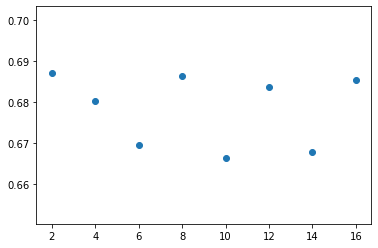

In [20]:
plt.scatter(enc_loss.dim, enc_loss.loss)

In [47]:
encoding_dim = 2
x = input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded2 = Dense(encoding_dim, activation='relu')(x)
    
x = Dense(128, activation='relu')(encoded2)
x = Dense(256, activation='relu')(x)
decoded2 = Dense(784, activation='sigmoid')(x)

autoencoder2 = Model(input_img, decoded2)

encoder2 = Model(input_img, encoded2)

encoded2_input = Input(shape=(encoding_dim,))

dcd1_2 = autoencoder2.layers[-1]
dcd2_2 = autoencoder2.layers[-2]
dcd3_2 = autoencoder2.layers[-3]

decoder2 = Model(encoded2_input, dcd1_2(dcd2_2(dcd3_2(encoded2_input))))

autoencoder2.compile(optimizer='adadelta', loss='binary_crossentropy')

In [49]:
encoding_dim = 4
x = input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded4 = Dense(encoding_dim, activation='relu')(x)
    
x = Dense(128, activation='relu')(encoded4)
x = Dense(256, activation='relu')(x)
decoded4 = Dense(784, activation='sigmoid')(x)

autoencoder4 = Model(input_img, decoded4)

encoder4 = Model(input_img, encoded4)

encoded4_input = Input(shape=(encoding_dim,))

dcd1_4 = autoencoder4.layers[-1]
dcd2_4 = autoencoder4.layers[-2]
dcd3_4 = autoencoder4.layers[-3]

decoder4 = Model(encoded4_input, dcd1_4(dcd2_4(dcd3_4(encoded4_input))))

autoencoder4.compile(optimizer='adadelta', loss='binary_crossentropy')

In [54]:
encoding_dim = 6
x = input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded6 = Dense(encoding_dim, activation='relu')(x)
    
x = Dense(128, activation='relu')(encoded6)
x = Dense(256, activation='relu')(x)
decoded6 = Dense(784, activation='sigmoid')(x)

autoencoder6 = Model(input_img, decoded6)

encoder6 = Model(input_img, encoded6)

encoded6_input = Input(shape=(encoding_dim,))

dcd1_6 = autoencoder6.layers[-1]
dcd2_6 = autoencoder6.layers[-2]
dcd3_6 = autoencoder6.layers[-3]

decoder6 = Model(encoded6_input, dcd1_6(dcd2_6(dcd3_6(encoded6_input))))

autoencoder6.compile(optimizer='adadelta', loss='binary_crossentropy')

In [56]:
encoding_dim = 8
x = input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded8 = Dense(encoding_dim, activation='relu')(x)
    
x = Dense(128, activation='relu')(encoded8)
x = Dense(256, activation='relu')(x)
decoded8 = Dense(784, activation='sigmoid')(x)

autoencoder8 = Model(input_img, decoded8)

encoder8 = Model(input_img, encoded8)

encoded8_input = Input(shape=(encoding_dim,))

dcd1_8 = autoencoder8.layers[-1]
dcd2_8 = autoencoder8.layers[-2]
dcd3_8 = autoencoder8.layers[-3]

decoder8 = Model(encoded8_input, dcd1_8(dcd2_8(dcd3_8(encoded8_input))))

autoencoder8.compile(optimizer='adadelta', loss='binary_crossentropy')

In [57]:
encoding_dim = 10
x = input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded10 = Dense(encoding_dim, activation='relu')(x)
    
x = Dense(128, activation='relu')(encoded10)
x = Dense(256, activation='relu')(x)
decoded10 = Dense(784, activation='sigmoid')(x)

autoencoder10 = Model(input_img, decoded10)

encoder10 = Model(input_img, encoded10)

encoded10_input = Input(shape=(encoding_dim,))

dcd1_10 = autoencoder10.layers[-1]
dcd2_10 = autoencoder10.layers[-2]
dcd3_10 = autoencoder10.layers[-3]

decoder10 = Model(encoded10_input, dcd1_10(dcd2_10(dcd3_10(encoded10_input))))

autoencoder10.compile(optimizer='adadelta', loss='binary_crossentropy')

In [58]:
encoding_dim = 12
x = input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded12 = Dense(encoding_dim, activation='relu')(x)
    
x = Dense(128, activation='relu')(encoded12)
x = Dense(256, activation='relu')(x)
decoded12 = Dense(784, activation='sigmoid')(x)

autoencoder12 = Model(input_img, decoded12)

encoder12 = Model(input_img, encoded12)

encoded12_input = Input(shape=(encoding_dim,))

dcd1_12 = autoencoder12.layers[-1]
dcd2_12 = autoencoder12.layers[-2]
dcd3_12 = autoencoder12.layers[-3]

decoder12 = Model(encoded12_input, dcd1_12(dcd2_12(dcd3_12(encoded12_input))))

autoencoder12.compile(optimizer='adadelta', loss='binary_crossentropy')

In [59]:
encoding_dim = 14
x = input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded14 = Dense(encoding_dim, activation='relu')(x)
    
x = Dense(128, activation='relu')(encoded14)
x = Dense(256, activation='relu')(x)
decoded14 = Dense(784, activation='sigmoid')(x)

autoencoder14 = Model(input_img, decoded14)

encoder14 = Model(input_img, encoded14)

encoded14_input = Input(shape=(encoding_dim,))

dcd1_14 = autoencoder14.layers[-1]
dcd2_14 = autoencoder14.layers[-2]
dcd3_14 = autoencoder14.layers[-3]

decoder14 = Model(encoded14_input, dcd1_14(dcd2_14(dcd3_14(encoded14_input))))

autoencoder14.compile(optimizer='adadelta', loss='binary_crossentropy')

In [60]:
encoding_dim = 16
x = input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded16 = Dense(encoding_dim, activation='relu')(x)
    
x = Dense(128, activation='relu')(encoded16)
x = Dense(256, activation='relu')(x)
decoded16 = Dense(784, activation='sigmoid')(x)

autoencoder16 = Model(input_img, decoded16)

encoder16 = Model(input_img, encoded16)

encoded16_input = Input(shape=(encoding_dim,))

dcd1_16 = autoencoder16.layers[-1]
dcd2_16 = autoencoder16.layers[-2]
dcd3_16 = autoencoder16.layers[-3]

decoder16 = Model(encoded16_input, dcd1_16(dcd2_16(dcd3_16(encoded16_input))))

autoencoder16.compile(optimizer='adadelta', loss='binary_crossentropy')

2. using the previous assignment's model of detecting images, how does the accuracy change when you run the digit-prediction model on these 'decoded' values?


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20


In [40]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape


((60000, 784), (10000, 784))

In [41]:
ytrain.shape, ytest.shape

((60000,), (10000,))

In [42]:
# convert class vectors to binary class matrices
ytrain = keras.utils.to_categorical(ytrain, num_classes)
ytest = keras.utils.to_categorical(ytest, num_classes)

In [43]:
ytrain.shape, ytest.shape

((60000, 10), (10000, 10))

In [48]:
## NN for encoding dimensions = 2
dec2_xtrain = autoencoder2.predict(xtrain)
dec2_xtest = autoencoder2.predict(xtest)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(dec2_xtrain, ytrain, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(dec2_xtest, ytest))



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 36s 60

In [53]:
score2 = model.evaluate(dec2_xtest, ytest, verbose=0)
score2

[2.3010858863830568, 0.1135]

In [51]:
## NN for encoding dimensions = 4
dec4_xtrain = autoencoder4.predict(xtrain)
dec4_xtest = autoencoder4.predict(xtest)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(dec4_xtrain, ytrain, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(dec4_xtest, ytest))


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 44s 73

In [52]:
score4 = model.evaluate(dec4_xtest, ytest, verbose=0)
score4

[2.3010858863830568, 0.1135]

In [61]:
## NN for encoding dimensions = 6
dec6_xtrain = autoencoder6.predict(xtrain)
dec6_xtest = autoencoder6.predict(xtest)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(dec6_xtrain, ytrain, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(dec6_xtest, ytest))


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_135 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_136 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 36s 6

In [62]:
score6 = model.evaluate(dec6_xtest, ytest, verbose=0)
score6

[2.301016479110718, 0.1135]

In [63]:
## NN for encoding dimensions = 8
dec8_xtrain = autoencoder8.predict(xtrain)
dec8_xtest = autoencoder8.predict(xtest)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(dec8_xtrain, ytrain, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(dec8_xtest, ytest))


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_138 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_139 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 38s 6

In [64]:
score8 = model.evaluate(dec8_xtest, ytest, verbose=0)
score8

[2.3010393608093263, 0.1135]

In [65]:
## NN for encoding dimensions = 10
dec10_xtrain = autoencoder10.predict(xtrain)
dec10_xtest = autoencoder10.predict(xtest)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(dec10_xtrain, ytrain, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(dec10_xtest, ytest))


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_141 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_142 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 36s 5

In [66]:
score10 = model.evaluate(dec10_xtest, ytest, verbose=0)
score10

[2.301020391082764, 0.1135]

In [67]:
## NN for encoding dimensions = 12
dec12_xtrain = autoencoder12.predict(xtrain)
dec12_xtest = autoencoder12.predict(xtest)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(dec12_xtrain, ytrain, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(dec12_xtest, ytest))


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_144 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_145 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 41s 6

In [68]:
score12 = model.evaluate(dec12_xtest, ytest, verbose=0)
score12

[2.301005292892456, 0.1135]

In [69]:
## NN for encoding dimensions = 14
dec14_xtrain = autoencoder14.predict(xtrain)
dec14_xtest = autoencoder14.predict(xtest)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(dec14_xtrain, ytrain, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(dec14_xtest, ytest))


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_146 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_147 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_148 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 36s 6

In [70]:
score14 = model.evaluate(dec14_xtest, ytest, verbose=0)
score14

[2.3010811389923096, 0.1135]

In [71]:
## NN for encoding dimensions = 16
dec16_xtrain = autoencoder16.predict(xtrain)
dec16_xtest = autoencoder16.predict(xtest)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(dec16_xtrain, ytrain, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(dec16_xtest, ytest))


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_150 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_151 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 35s 5

In [72]:
score16 = model.evaluate(dec16_xtest, ytest, verbose=0)
score16

[2.301087324523926, 0.1135]

In [75]:
seq_scores = pd.DataFrame()
seq_scores['dims'] = (range(2,18,2))
seq_scores['loss'] = (score2[0], score4[0], score6[0], score8[0], score10[0], score12[0], score14[0], score16[0])
seq_scores['accuracy'] = (score2[1], score4[1], score6[1], score8[1], score10[1], score12[1], score14[1], score16[1])
seq_scores

,dims,loss,accuracy
0,2,2.301086,0.1135
1,4,2.301086,0.1135
2,6,2.301016,0.1135
3,8,2.301039,0.1135
4,10,2.301020,0.1135
5,12,2.301005,0.1135
6,14,2.301081,0.1135
7,16,2.301087,0.1135


3. apply noise to *_only_* the input of the autoencoder (not the output). demonstrate that your autoencoder can strip out noise.

In [52]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain.shape, xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [53]:
train_noise = np.random.normal(0, 0.1, [60000, 784])
np.min(train_noise), np.max(train_noise)

(-0.5496583900677692, 0.5495254822107005)

In [54]:
test_noise = np.random.normal(0, 0.1, [10000, 784])
np.min(test_noise), np.max(test_noise)

(-0.5162923849531901, 0.5375644237961521)

In [68]:
#output data
xtrain_output = xtrain.astype('float32') / 255.
xtest_output = xtest.astype('float32') / 255.

In [69]:
np.min(xtrain_output), np.max(xtrain_output)

(0.0, 1.0)

In [70]:
xtrain_output = xtrain_output.reshape(60000, 784)
xtest_output = xtest_output.reshape(10000, 784)

xtrain_output.shape, xtest_output.shape

((60000, 784), (10000, 784))

In [71]:
np.min(xtrain_output), np.max(xtrain_output)

(0.0, 1.0)

In [72]:
#input data
xtrain_noise = xtrain_output + train_noise
xtest_noise = xtest_output + test_noise

xtrain_noise.shape, xtest_noise.shape

((60000, 784), (10000, 784))

In [73]:
np.min(xtrain_noise), np.max(xtrain_noise)

(-0.5268025088802835, 1.5173605030050625)

In [81]:
noise_loss = []

for i in (range(2, 18, 2)): 
    encoding_dim = i
    x = input_img = Input(shape=(784,))
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded_noise = Dense(encoding_dim, activation='relu')(x)

    x = Dense(128, activation='relu')(encoded_noise)
    x = Dense(256, activation='relu')(x)
    decoded_noise = Dense(784, activation='sigmoid')(x)

    autoencoder_noise = Model(input_img, decoded_noise)

    encoder_noise = Model(input_img, encoded_noise)

    encoded_noise_input = Input(shape=(encoding_dim,))

    dcd1_noise = autoencoder_noise.layers[-1]
    dcd2_noise = autoencoder_noise.layers[-2]
    dcd3_noise = autoencoder_noise.layers[-3]

    decoder_noise = Model(encoded_noise_input, dcd1_noise(dcd2_noise(dcd3_noise(encoded_noise_input))))

    autoencoder_noise.compile(optimizer='adadelta', loss='binary_crossentropy')

    autoencoder_noise.fit(xtrain_noise, xtrain_output,
                        epochs=100,
                        batch_size=256,
                        shuffle=True,
                        validation_data=(xtest_noise, xtest_output))

    noise_loss = np.append(noise_loss, np.array(autoencoder_noise.evaluate(xtrain_noise, xtrain_output)))
 

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 44s 729us/sample - loss: 0.6934 - val_loss: 0.6934
Epoch 2/100
60000/60000 [==============================] - 42s 704us/sample - loss: 0.6933 - val_loss: 0.6933
Epoch 3/100
60000/60000 [==============================] - 23s 381us/sample - loss: 0.6933 - val_loss: 0.6932
Epoch 4/100
60000/60000 [==============================] - 22s 368us/sample - loss: 0.6932 - val_loss: 0.6931
Epoch 5/100
60000/60000 [==============================] - 25s 423us/sample - loss: 0.6931 - val_loss: 0.6931
Epoch 6/100
60000/60000 [==============================] - 27s 453us/sample - loss: 0.6930 - val_loss: 0.6930
Epoch 7/100
60000/60000 [==============================] - 22s 368us/sample - loss: 0.6930 - val_loss: 0.6929
Epoch 8/100
60000/60000 [==============================] - 22s 370us/sample - loss: 0.6929 - val_loss: 0.6929
Epoch 9/100
60000/60000 [==============================] - 26s 438us/s

60000/60000 [==============================] - 21s 344us/sample - loss: 0.6885 - val_loss: 0.6884
Epoch 75/100
60000/60000 [==============================] - 26s 428us/sample - loss: 0.6884 - val_loss: 0.6884
Epoch 76/100
60000/60000 [==============================] - 21s 351us/sample - loss: 0.6883 - val_loss: 0.6883
Epoch 77/100
60000/60000 [==============================] - 22s 372us/sample - loss: 0.6882 - val_loss: 0.6882
Epoch 78/100
60000/60000 [==============================] - 23s 390us/sample - loss: 0.6882 - val_loss: 0.6881
Epoch 79/100
60000/60000 [==============================] - 20s 331us/sample - loss: 0.6881 - val_loss: 0.6881
Epoch 80/100
60000/60000 [==============================] - 20s 337us/sample - loss: 0.6880 - val_loss: 0.6880
Epoch 81/100
60000/60000 [==============================] - 21s 355us/sample - loss: 0.6880 - val_loss: 0.6879
Epoch 82/100
60000/60000 [==============================] - 22s 373us/sample - loss: 0.6879 - val_loss: 0.6879
Epoch 83/100
6

Epoch 47/100
60000/60000 [==============================] - 20s 341us/sample - loss: 0.6895 - val_loss: 0.6895
Epoch 48/100
60000/60000 [==============================] - 21s 356us/sample - loss: 0.6894 - val_loss: 0.6894
Epoch 49/100
60000/60000 [==============================] - 22s 366us/sample - loss: 0.6894 - val_loss: 0.6893
Epoch 50/100
60000/60000 [==============================] - 21s 348us/sample - loss: 0.6893 - val_loss: 0.6892
Epoch 51/100
60000/60000 [==============================] - 23s 386us/sample - loss: 0.6892 - val_loss: 0.6891
Epoch 52/100
60000/60000 [==============================] - 36s 600us/sample - loss: 0.6891 - val_loss: 0.6890
Epoch 53/100
60000/60000 [==============================] - 22s 362us/sample - loss: 0.6890 - val_loss: 0.6890
Epoch 54/100
60000/60000 [==============================] - 21s 352us/sample - loss: 0.6889 - val_loss: 0.6889
Epoch 55/100
60000/60000 [==============================] - 21s 357us/sample - loss: 0.6888 - val_loss: 0.6888
E

60000/60000 [==============================] - 21s 354us/sample - loss: 0.6919 - val_loss: 0.6919
Epoch 20/100
60000/60000 [==============================] - 21s 353us/sample - loss: 0.6919 - val_loss: 0.6918
Epoch 21/100
60000/60000 [==============================] - 21s 353us/sample - loss: 0.6918 - val_loss: 0.6917
Epoch 22/100
60000/60000 [==============================] - 21s 356us/sample - loss: 0.6917 - val_loss: 0.6917
Epoch 23/100
60000/60000 [==============================] - 22s 364us/sample - loss: 0.6916 - val_loss: 0.6916
Epoch 24/100
60000/60000 [==============================] - 21s 357us/sample - loss: 0.6915 - val_loss: 0.6915
Epoch 25/100
60000/60000 [==============================] - 22s 361us/sample - loss: 0.6915 - val_loss: 0.6914
Epoch 26/100
60000/60000 [==============================] - 21s 354us/sample - loss: 0.6914 - val_loss: 0.6913
Epoch 27/100
60000/60000 [==============================] - 22s 361us/sample - loss: 0.6913 - val_loss: 0.6913
Epoch 28/100
6

60000/60000 [==============================] - 22s 365us/sample - loss: 0.6825 - val_loss: 0.6822
Epoch 94/100
60000/60000 [==============================] - 22s 370us/sample - loss: 0.6822 - val_loss: 0.6819
Epoch 95/100
60000/60000 [==============================] - 22s 365us/sample - loss: 0.6819 - val_loss: 0.6816
Epoch 96/100
60000/60000 [==============================] - 22s 374us/sample - loss: 0.6816 - val_loss: 0.6813
Epoch 97/100
60000/60000 [==============================] - 23s 376us/sample - loss: 0.6813 - val_loss: 0.6810
Epoch 98/100
60000/60000 [==============================] - 23s 388us/sample - loss: 0.6809 - val_loss: 0.6807
Epoch 99/100
60000/60000 [==============================] - 23s 379us/sample - loss: 0.6806 - val_loss: 0.6803
Epoch 100/100
60000/60000 [==============================] - 21s 342us/sample - loss: 0.6801
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 29s 489us/sample - loss: 0.6933 - 

60000/60000 [==============================] - 22s 372us/sample - loss: 0.6877 - val_loss: 0.6876
Epoch 66/100
60000/60000 [==============================] - 22s 371us/sample - loss: 0.6876 - val_loss: 0.6875
Epoch 67/100
60000/60000 [==============================] - 24s 406us/sample - loss: 0.6874 - val_loss: 0.6873
Epoch 68/100
60000/60000 [==============================] - 25s 420us/sample - loss: 0.6873 - val_loss: 0.6872
Epoch 69/100
60000/60000 [==============================] - 22s 363us/sample - loss: 0.6872 - val_loss: 0.6871
Epoch 70/100
60000/60000 [==============================] - 23s 384us/sample - loss: 0.6871 - val_loss: 0.6870
Epoch 71/100
60000/60000 [==============================] - 22s 368us/sample - loss: 0.6870 - val_loss: 0.6869
Epoch 72/100
60000/60000 [==============================] - 22s 369us/sample - loss: 0.6868 - val_loss: 0.6867
Epoch 73/100
60000/60000 [==============================] - 22s 369us/sample - loss: 0.6867 - val_loss: 0.6866
Epoch 74/100
6

60000/60000 [==============================] - 22s 372us/sample - loss: 0.6883 - val_loss: 0.6882
Epoch 38/100
60000/60000 [==============================] - 21s 356us/sample - loss: 0.6881 - val_loss: 0.6880
Epoch 39/100
60000/60000 [==============================] - 21s 351us/sample - loss: 0.6879 - val_loss: 0.6878
Epoch 40/100
60000/60000 [==============================] - 21s 347us/sample - loss: 0.6878 - val_loss: 0.6876
Epoch 41/100
60000/60000 [==============================] - 21s 347us/sample - loss: 0.6876 - val_loss: 0.6875
Epoch 42/100
60000/60000 [==============================] - 21s 347us/sample - loss: 0.6874 - val_loss: 0.6873
Epoch 43/100
60000/60000 [==============================] - 21s 352us/sample - loss: 0.6872 - val_loss: 0.6871
Epoch 44/100
60000/60000 [==============================] - 21s 352us/sample - loss: 0.6870 - val_loss: 0.6869
Epoch 45/100
60000/60000 [==============================] - 21s 352us/sample - loss: 0.6868 - val_loss: 0.6867
Epoch 46/100
6

60000/60000 [==============================] - 19s 319us/sample - loss: 0.6929 - val_loss: 0.6929
Epoch 10/100
60000/60000 [==============================] - 19s 314us/sample - loss: 0.6929 - val_loss: 0.6928
Epoch 11/100
60000/60000 [==============================] - 20s 338us/sample - loss: 0.6928 - val_loss: 0.6928
Epoch 12/100
60000/60000 [==============================] - 20s 332us/sample - loss: 0.6927 - val_loss: 0.6927
Epoch 13/100
60000/60000 [==============================] - 19s 323us/sample - loss: 0.6927 - val_loss: 0.6926
Epoch 14/100
60000/60000 [==============================] - 19s 318us/sample - loss: 0.6926 - val_loss: 0.6925
Epoch 15/100
60000/60000 [==============================] - 19s 321us/sample - loss: 0.6925 - val_loss: 0.6925
Epoch 16/100
60000/60000 [==============================] - 31s 510us/sample - loss: 0.6924 - val_loss: 0.6924
Epoch 17/100
60000/60000 [==============================] - 20s 330us/sample - loss: 0.6924 - val_loss: 0.6923
Epoch 18/100
6

60000/60000 [==============================] - 22s 366us/sample - loss: 0.6877 - val_loss: 0.6877
Epoch 83/100
60000/60000 [==============================] - 22s 363us/sample - loss: 0.6876 - val_loss: 0.6876
Epoch 84/100
60000/60000 [==============================] - 22s 363us/sample - loss: 0.6875 - val_loss: 0.6875
Epoch 85/100
60000/60000 [==============================] - 22s 365us/sample - loss: 0.6875 - val_loss: 0.6874
Epoch 86/100
60000/60000 [==============================] - 23s 381us/sample - loss: 0.6874 - val_loss: 0.6873s - loss: 0.
Epoch 87/100
60000/60000 [==============================] - 22s 362us/sample - loss: 0.6873 - val_loss: 0.6873
Epoch 88/100
60000/60000 [==============================] - 23s 382us/sample - loss: 0.6872 - val_loss: 0.6872
Epoch 89/100
60000/60000 [==============================] - 22s 362us/sample - loss: 0.6871 - val_loss: 0.6871
Epoch 90/100
60000/60000 [==============================] - 22s 366us/sample - loss: 0.6871 - val_loss: 0.68700s 

60000/60000 [==============================] - 23s 388us/sample - loss: 0.6890 - val_loss: 0.6889
Epoch 54/100
60000/60000 [==============================] - 23s 385us/sample - loss: 0.6889 - val_loss: 0.6888
Epoch 55/100
60000/60000 [==============================] - 23s 379us/sample - loss: 0.6888 - val_loss: 0.6887
Epoch 56/100
60000/60000 [==============================] - 22s 365us/sample - loss: 0.6887 - val_loss: 0.6886
Epoch 57/100
60000/60000 [==============================] - 24s 406us/sample - loss: 0.6886 - val_loss: 0.6885
Epoch 58/100
60000/60000 [==============================] - 23s 387us/sample - loss: 0.6885 - val_loss: 0.6884
Epoch 59/100
60000/60000 [==============================] - 23s 389us/sample - loss: 0.6884 - val_loss: 0.6883
Epoch 60/100
60000/60000 [==============================] - 22s 375us/sample - loss: 0.6883 - val_loss: 0.6882
Epoch 61/100
60000/60000 [==============================] - 29s 476us/sample - loss: 0.6881 - val_loss: 0.6881
Epoch 62/100
6

60000/60000 [==============================] - 24s 397us/sample - loss: 0.6919 - val_loss: 0.6918
Epoch 26/100
60000/60000 [==============================] - 23s 378us/sample - loss: 0.6918 - val_loss: 0.6917 l - ETA: 0s - los
Epoch 27/100
60000/60000 [==============================] - 22s 373us/sample - loss: 0.6917 - val_loss: 0.6917
Epoch 28/100
60000/60000 [==============================] - 22s 374us/sample - loss: 0.6916 - val_loss: 0.6916
Epoch 29/100
60000/60000 [==============================] - 24s 401us/sample - loss: 0.6916 - val_loss: 0.6915
Epoch 30/100
60000/60000 [==============================] - 24s 395us/sample - loss: 0.6915 - val_loss: 0.6914
Epoch 31/100
60000/60000 [==============================] - 24s 402us/sample - loss: 0.6914 - val_loss: 0.6914
Epoch 32/100
60000/60000 [==============================] - 24s 395us/sample - loss: 0.6913 - val_loss: 0.6913
Epoch 33/100
60000/60000 [==============================] - 24s 396us/sample - loss: 0.6913 - val_loss: 0.6

60000/60000 [==============================] - 24s 396us/sample - loss: 0.6850 - val_loss: 0.6849
Epoch 99/100
60000/60000 [==============================] - 24s 392us/sample - loss: 0.6849 - val_loss: 0.6847
Epoch 100/100
60000/60000 [==============================] - 28s 466us/sample - loss: 0.6846


In [85]:
enc_loss['loss_noise'] = noise_loss
enc_loss

,dim,loss,loss_noise
0,2,0.687213,0.686489
1,4,0.680153,0.682172
2,6,0.669503,0.680069
3,8,0.686313,0.681699
4,10,0.666447,0.621645
5,12,0.683733,0.686188
6,14,0.667883,0.680921
7,16,0.685315,0.684650
